In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv('loan_features.csv')

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
ss = StandardScaler()
y= df.STATUS
X = df.drop('STATUS',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
rf = RandomForestClassifier( random_state=0)
rf.fit(X_train, y_train);

/Users/k.krieg/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
from sklearn.metrics import classification_report
target_names = ['Unfunded','Funded']
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Unfunded       0.16      0.13      0.14     20993
      Funded       0.96      0.96      0.96    430228

    accuracy                           0.93    451221
   macro avg       0.56      0.55      0.55    451221
weighted avg       0.92      0.93      0.92    451221



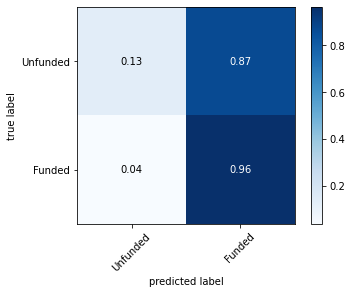

In [33]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = target_names,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)